In [2]:
import numpy as np
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

print (dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
from sklearn.model_selection import train_test_split #lib to divide dataset in train and test
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

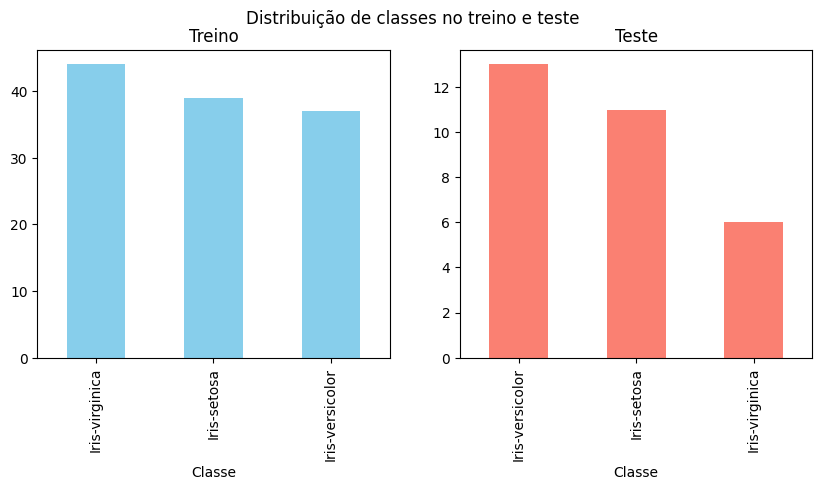

In [8]:
import matplotlib.pyplot as plt

# Contagem das classes no treino e teste
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Plot lado a lado
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

train_counts.plot(kind='bar', ax=ax[0], color='skyblue', title='Treino')
test_counts.plot(kind='bar', ax=ax[1], color='salmon',  title='Teste')

ax[0].set_xlabel("Classe")
ax[1].set_xlabel("Classe")

plt.suptitle("Distribuição de classes no treino e teste")
plt.show()

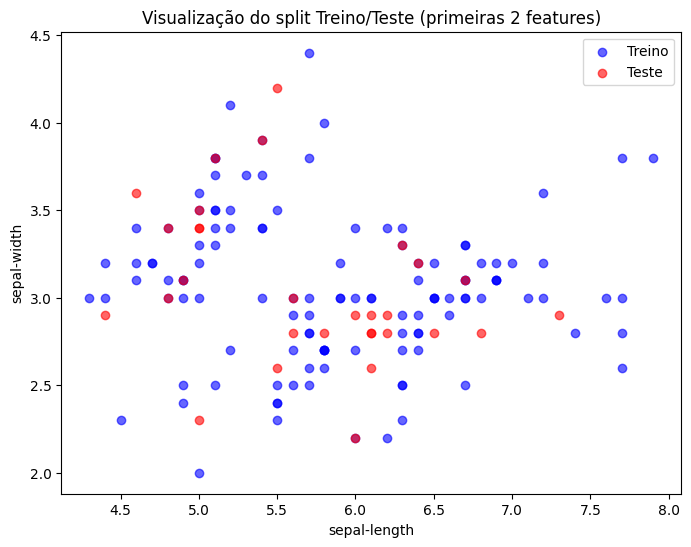

In [9]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='blue', label='Treino', alpha=0.6)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c='red', label='Teste', alpha=0.6)

plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend()
plt.title("Visualização do split Treino/Teste (primeiras 2 features)")
plt.show()

In [10]:
#vamos colocar as características na mesma escala para melhor funcionamento do PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#vendo o PCA e seu efeito prático favorecendo um classificador, no caso, uma random forest

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

for i in range(X_train.shape[1]):
    pca = PCA(n_components=i+1) #o i + 1 vai rodar por todas as features até voltar a original. A ideia é testar as redução até chegar na original e medir a performance do modelo.
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(pca_X_train, y_train)

y_pred = classifier.predict(pca_X_test)
cm = confusion_matrix(y_test, y_pred)
print ("---------------------------------------------------------------")
print("PCA: ", i+1)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Dataset Var: ', pca_X_train.var())
for c in range(pca_X_train.shape[1]):
    print("Component(",c+1,"):", pca_X_train[c].var())
    print("---------------------------------------------------------------")


---------------------------------------------------------------
PCA:  4
[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]
Accuracy: 0.9
Dataset Var:  1.0000000000000009
Component( 1 ): 0.28278585335687567
---------------------------------------------------------------
Component( 2 ): 0.13248378929197213
---------------------------------------------------------------
Component( 3 ): 1.1785223120455175
---------------------------------------------------------------
Component( 4 ): 0.22368712813177372
---------------------------------------------------------------
